# Long Short-Term Memory (LSTM) model

In [1]:
import os
import sys
sys.path.insert(0, './utils/')
from utils import Experiment

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, TimeDistributed, Reshape, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import BatchNormalization, LSTM, Bidirectional, Conv1D, Permute
import tensorflow.keras.optimizers as optimizers

def get_lstm_model(input_shape, lr=1e-5):
    i = Input(shape=(input_shape))
    print(i.shape)
    m = i
    m = Permute((2, 1))(m)
    m = Dropout(0.05)(m)
    m = LSTM(50, activation='relu')(m)
    m = Dense(500, activation='relu')(m)
    m = Dense(200, activation='relu')(m)
    m = Dense(1, activation='relu')(m)
    
    model = Model(inputs=[i], outputs=[m])

    optimizer=optimizers.Adam(lr=lr)
    model.compile(optimizer, 'mae')
    return model

# Autoregression

W1002 03:33:56.493040 140453955364672 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Normalizing Features!
(?, 23, 170)
Training...


W1002 03:33:57.147337 140453955364672 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Elapsed Time: 544.6852638721466


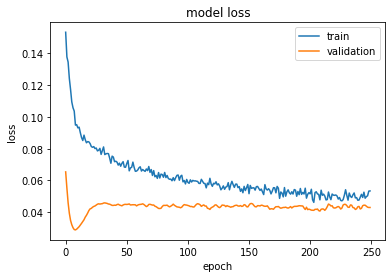

Train MAE: 15.431616585417444


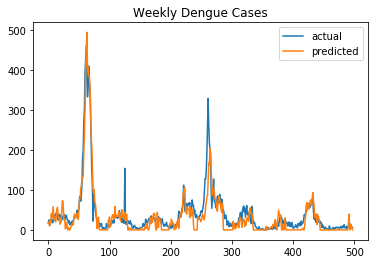

Validation MAE: 19.8235860750663


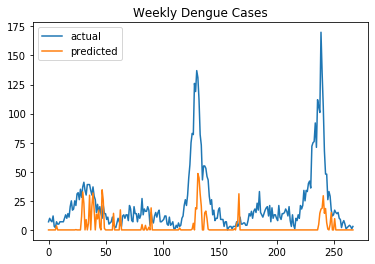

Forecast MAE: 21.647544636210398


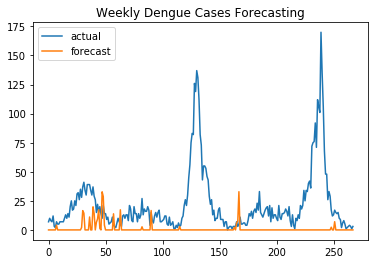

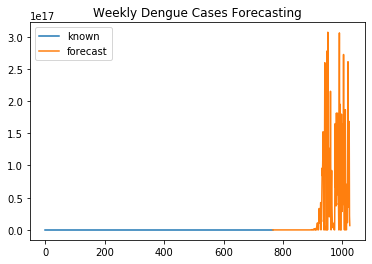

(15.431616585417444, 19.8235860750663, 21.647544636210398)


In [3]:
hyperparameters = {
    'train_split_percent': 0.65,
    'lookback_window': 170,
    'plot':True,
    'normalize': True,
    'epochs': 250,
    'verbose':False,
    'lr':5e-6,
    'city':'sj',
}
experiment = Experiment(get_lstm_model, hyperparameters)
stats_df_1, df_sj_1 = experiment.run()
print(stats_df_1)

In [4]:
hyperparameters = {
    'train_split_percent': 0.65,
    'lookback_window': 170,
    'plot':True,
    'normalize': True,
    'epochs': 400,
    'lr': 5e-6,
    'verbose': 2,
    'city':'iq'
}
experiment = Experiment(get_model, hyperparameters)
stats_iq_1, df_iq_1 = experiment.run()
print(stats_iq_1)

NameError: name 'get_model' is not defined

## Feature Regression

In [ ]:
hyperparameters = {
    'train_split_percent': 0.65,
    'lookback_window': 170,
    'plot':True,
    'normalize': True,
    'epochs': 250,
    'lr': 5e-6,
    'verbose':False,
    'only_features':True,
    'city':'sj',
}
experiment = Experiment(get_lstm_model, hyperparameters)
stats_df_2, df_sj_2 = experiment.run()
print(stats_df_2)

In [ ]:
hyperparameters = {
    'train_split_percent': 0.65,
    'lookback_window': 170,
    'plot':True,
    'normalize': True,
    'only_features':True,
    'epochs': 400,
    'lr': 5e-6,
    'verbose': 2,
    'city':'iq'
}
experiment = Experiment(get_lstm_model, hyperparameters)
stats_iq_2, df_iq_2 = experiment.run()
print(stats_iq_2)